# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_number_of_poi'
time_path = 'data/time/compare_number_of_poi_2020_12_3_2_55_21.npy'
cost_path = 'data/cost/compare_number_of_poi_2020_12_3_2_55_21.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.arange(10, 101, step=10)
repeats = len(sizes)

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(30,) (30,)
Wall time: 4.99 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   approx      10 non-null     float64
 2   approx_woc  10 non-null     float64
 3   size        10 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 408.0 bytes
None


,greedy,approx,approx_woc,size
0,0.000000,1.008765,0.259441,10
1,0.000000,0.901078,0.174665,20
2,0.000100,0.834144,0.099332,30
3,0.000200,0.904294,0.085457,40
4,0.000000,0.934009,0.049465,50
5,0.000199,0.830576,0.036386,60
6,0.000200,0.879151,0.035999,70
7,0.000000,0.783054,0.024537,80
8,0.000100,0.765565,0.035576,90
9,0.000100,0.727391,0.021145,100


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   approx      10 non-null     float64
 2   approx_woc  10 non-null     float64
 3   size        10 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 408.0 bytes
None


,greedy,approx,approx_woc,size
0,14713.7,10948.4,11283.6,10
1,11511.2,9560.3,9785.3,20
2,9283.5,7905.6,8328.0,30
3,7818.8,7135.7,7153.5,40
4,6395.7,5941.3,5992.5,50
5,6257.8,5789.8,5938.2,60
6,5781.1,5542.9,5612.5,70
7,5167.1,4926.6,5041.3,80
8,5527.6,5160.5,5217.3,90
9,4864.1,4666.8,4726.2,100


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy         0.000090
approx         0.856803
approx_woc     0.082200
size          55.000000
dtype: float64

## Ride-sharing efficiency

In [7]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,14713.7,10948.4,11283.6,10,1.343913,1.303990
1,11511.2,9560.3,9785.3,20,1.204063,1.176377
2,9283.5,7905.6,8328.0,30,1.174294,1.114733
3,7818.8,7135.7,7153.5,40,1.095730,1.093003
4,6395.7,5941.3,5992.5,50,1.076482,1.067284
5,6257.8,5789.8,5938.2,60,1.080832,1.053821
6,5781.1,5542.9,5612.5,70,1.042974,1.030040
7,5167.1,4926.6,5041.3,80,1.048817,1.024954
8,5527.6,5160.5,5217.3,90,1.071137,1.059475
9,4864.1,4666.8,4726.2,100,1.042277,1.029178


In [8]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.118052
approx_woc_gain    1.095286
dtype: float64

In [9]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        7732.06
approx        6757.79
approx_woc    6907.84
dtype: float64

# Plots

## Processing time

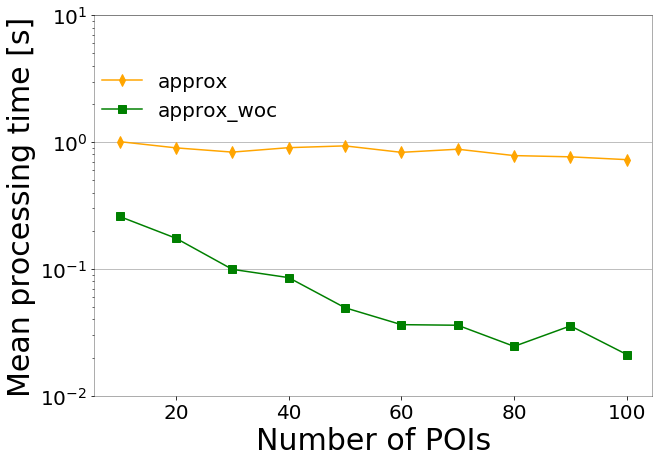

In [10]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**1), 
    xlabel='Number of POIs',
    legend_loc=(0, 0.7)
)

## Travel cost

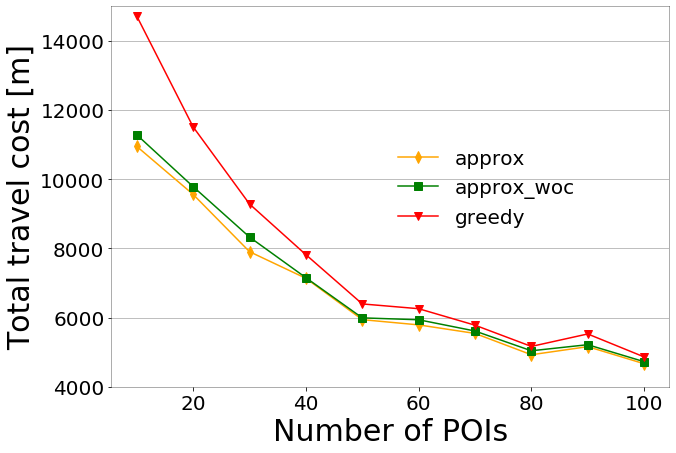

In [11]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(4000,15000), 
    xlabel='Number of POIs',
    legend_loc=(0.5, 0.4)
)

## Ride-sharing efficiency

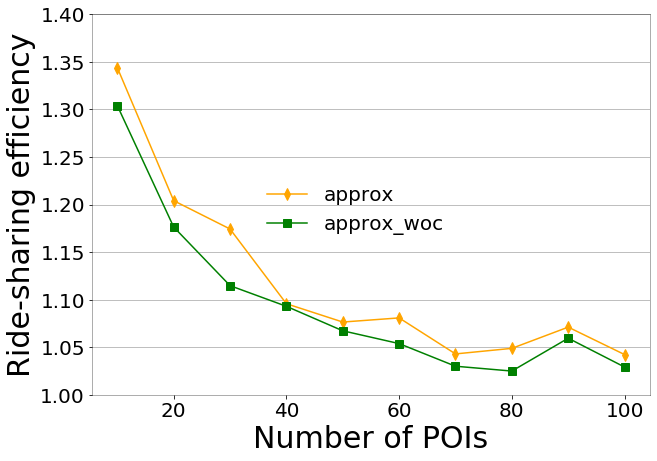

In [12]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.,1.4), 
    xlabel='Number of POIs',
    legend_loc=(0.3, 0.4)
)